In [2]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches

import pickle as pk

from scipy.stats import pearsonr as pc
from scipy.stats import poisson
from scipy.integrate import quad
from scipy.optimize import minimize

from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error

In [3]:
''' Setting the initial values. '''

#parameters
I0 = 3e-5     # 1/(kb.min)
R0 = 0.1   # kb^-1
tau = 60   # min
v = 1.65   # kb/min
lf = 300   # kb


xb = 300     # kb
dx = 1       # kb
n_x = int(2*xb/dx)     

tb = 90       # min
dt = 1       # min
n_t = int(tb/dt)

In [4]:
%%time
''' Simulating one replication process. '''

init_pos = np.zeros([n_x, n_t])      # [time, position]
avg_init = I0*tb*(2*xb)
n_init = poisson.rvs(avg_init)
for i_init in range(n_init):
    x_init = np.random.randint(n_x)
    t_init = np.random.randint(n_t)
    init_pos[x_init, t_init] = 1

CPU times: user 999 µs, sys: 147 µs, total: 1.15 ms
Wall time: 767 µs


In [5]:
np.where(init_pos==1)

(array([137, 198]), array([47,  1]))

In [44]:
''' Finding the replication the track time and position from the initiation times and positions. '''

def Replication_Track (initiation_space):        # initiation space: time and location, 0: no init 1:initiation
    n_initiation = int(np.sum(initiation_space))
    initiation_time_position = np.where(initiation_space==1)
    track_time = np.zeros(n_x)      # the time of replication fork passing by at each position
    for i in range(n_x):
        t_tracks = np.zeros(n_initiation+1)
        for j in range(n_initiation):
            init_time = initiation_time_position[1][j]*dt
            init_position = initiation_time_position[0][j]*dx
            t_tracks[j] = init_time + np.abs(i*dx-init_position)/v
        t_tracks[n_initiation] = tb
        track_time[i] = np.min(t_tracks)
    return track_time

In [45]:
''' Finding the replicated and unreplicated space from the replication tracks. '''

replication_track = Replication_Track(init_pos)
replicated_space = np.zeros([n_x, n_t])
for i in range(n_x):
    unrep = int(replication_track[i]/dt)
    for j in range(unrep):
        replicated_space[i, j] = 1

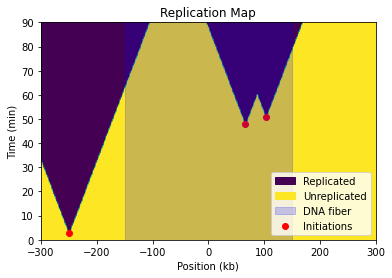

In [46]:
''' Plotting the spatiotemporal organization of the initation events. '''

fig, ax=plt.subplots()
im_rep = ax.imshow(replicated_space.transpose(), origin='lower', extent = (-xb, xb, 0, tb), aspect='auto',
          label='replicated \n unreplicated')
ax.set_title('Replication Map')
ax.set_xlabel('Position (kb)')
ax.set_ylabel('Time (min)')

im_fiber = ax.axvspan(-lf/2, lf/2, color='blue', alpha=0.2, label = 'DNA fiber')

im_init = plt.scatter((np.where(init_pos==1)[0]-n_x/2)*dx, np.where(init_pos==1)[1]*dt,
                      label='Initiations', color='red')

values = np.unique(replicated_space.ravel())
colors = [ im_rep.cmap(im_rep.norm(value)) for value in values]
patches = [ mpatches.Patch(color=colors[0], label='Replicated' ), 
           mpatches.Patch(color=colors[1], label='Unreplicated' ), im_fiber, im_init]



ax.legend(handles=patches, loc=4)

In [116]:
%%time
''' Comparing the two methods of simulating multiple independent poisson distributions. '''

N = 10000
l0 = 5
l1 = 20
l = l0+l1
p0 = l0/l
p1 = l1/l
p = [p0, p1]


n = np.zeros(N)
m0 = np.zeros(N)
m1 = np.zeros(N)

for i in range(N):
    n0[i] = poisson.rvs(l0)
    n1[i] = poisson.rvs(l1)
    n[i] = poisson.rvs(l)
    m1[i] = np.sum(np.random.choice(2, int(n[i]), p=p))
    m0[i] = n[i] - m1[i]


CPU times: user 2.04 s, sys: 0 ns, total: 2.04 s
Wall time: 2.03 s


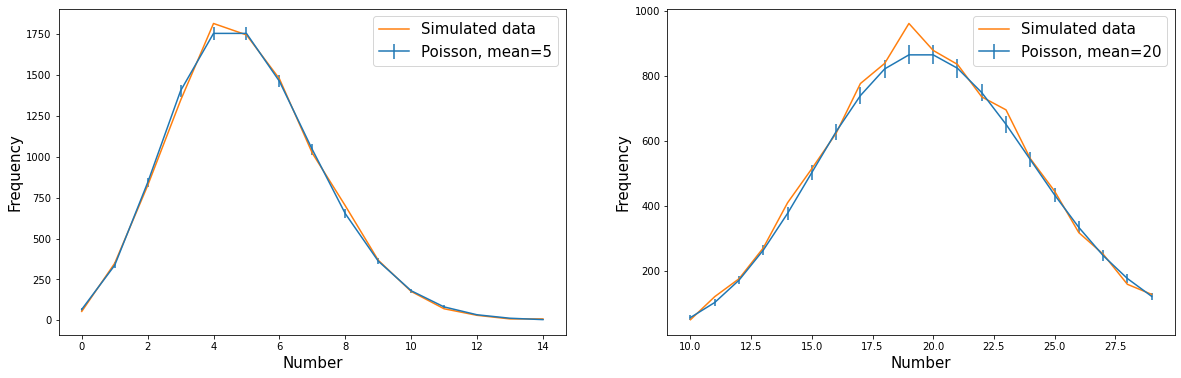

In [138]:
fig, (ax0, ax1) = plt.subplots(nrows=1, ncols=2)

fig.set_size_inches(20,6)

bin0 = np.arange(-0.5, l0*3+0.5, 1)
bin1 = np.arange(l1/2-0.5, l1*1.5+0.5, 1)

m0_hist = np.histogram(m0, bins=bin0)
m1_hist = np.histogram(m1, bins=bin1)

x0 = (bin0[1:]+bin0[:-1])/2
x1 = (bin1[1:]+bin1[:-1])/2

z0 = m0_hist[0]
z1 = m1_hist[0]

y0 = np.sum(z0)*poisson.pmf(x0, mu=l0)
y1 = np.sum(z1)*poisson.pmf(x1, mu=l1)

ax0.errorbar(x0, y0, np.sqrt(y0), label='Poisson, mean=' + str(l0))
ax0.plot(x0, z0, label='Simulated data')
ax0.set_xlabel('Number', fontsize=15)
ax0.set_ylabel('Frequency', fontsize=15)
ax0.legend(loc='best', fontsize=15)

ax1.errorbar(x1, y1, np.sqrt(y1), label='Poisson, mean=' + str(l1))
ax1.plot(x1, z1, label='Simulated data')
ax1.set_xlabel('Number', fontsize=15)
ax1.set_ylabel('Frequency', fontsize=15)
ax1.legend(loc='best', fontsize=15 

In [9]:
''' Setting the initial values. '''

#parameters
I0 = np.array([13-6, 3e-6, 1e-5 , 3e-5])    # 1/kb.min
R0 = np.array([0.01, 0.03, 0.1, 0.3])   # kb^-1
tau = np.array([3, 10, 30, 90]) # min
v = 1.65   # kb/min
lf = 300   # kb


xb = 300     # kb
dx = 1       # kb
n_x = int(2*xb/dx)     

tb = 90       # min
dt = 1       # min
n_t = int(tb/dt)

n_sim = 1000

In [12]:
''' Setting the initial values. '''

#parameters
I0 = np.array([1e-6, 3e-6, 1e-5 , 3e-5])    # 1/kb.min
R0 = np.array([0.01, 0.03, 0.1, 0.3])   # kb^-1
tau = np.array([5, 10, 20, 40]) # min
v = 1.65   # kb/min
lf = 300   # kb


xb = 300     # kb
dx = 3       # kb
n_x = int(2*xb/dx)     

tb = 90       # min
dt = 1       # min
n_t = int(tb/dt)

n_sim = 10000

I0, R0, T = 1e-05 0.3 10
Minimum mse is: 0.26741318101205547
CPU times: user 5h 15min 53s, sys: 20min 56s, total: 5h 36min 50s
Wall time: 5h 36min 51s


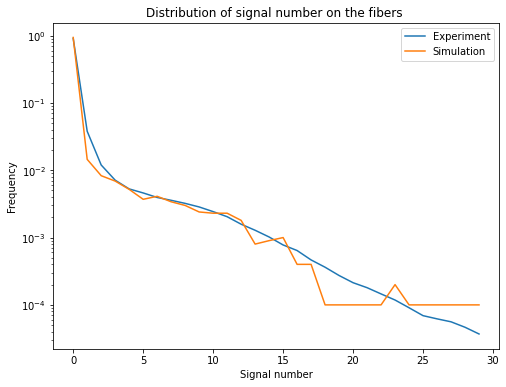

In [13]:
%%time

file_name = "../chromosomes/chr1/frag_sig.pkl"

open_file = open(file_name, "rb")

frag_sig = pk.load(open_file)

open_file.close()

n_fiber = len(frag_sig)
signal_number = []   # number of signals at each fragment

for i in range(n_fiber):
    signal_number += [len(frag_sig[i]) - 2]

signal_number = np.array(signal_number)

mse = np.zeros( [len(I0), len(R0), len(tau)] )

pos = np.linspace(int(-xb/2), int(xb/2), int(n_x/2)+1)
bins = np.linspace(0, 30, 31) - 0.5

signal_dist, signal_bins = np.histogram(signal_number, bins)
signal_dist_norm = signal_dist/np.sum(signal_dist)

sim_dist = np.zeros( [len(I0), len(R0), len(tau), len(signal_dist)] )

for k1 in range(len(I0)):
    
    I_0 = I0[k1]
    t_track = np.zeros( [n_sim, int(n_x/2) + 1] )
    avg_init = I_0*tb*(2*xb)
    
    for i in range(n_sim):

        init = []
        n_init = int(poisson.rvs(avg_init))
        init = np.zeros([n_init, 2])
        init[:, 0] = (np.random.choice(n_x+1, n_init)-n_x/2)*dx
        init[:, 1] = np.random.choice(n_t+1, n_init)*dt

        track = np.zeros([n_init+1, int(n_x/2)+1])
        for j in range(n_init):
            track[j, :] = init[j, 1] + np.abs(pos-init[j, 0])/v
        track[-1, :] = tb
        t_track[i, :] = np.min(track, axis=0)
    
    for k2 in range(len(R0)):
        for k3 in range(len(tau)):
            
            R_0 = R0[k2]
            T = tau[k3]
            
            inc = R_0*np.exp( -(t_track/T)**2/2 )*dx
            
            avg_label = np.sum(inc, axis = 1)
            n_labels = poisson.rvs(avg_label)
            sim_dist[k1, k2, k3], sim_bins = np.histogram(n_labels, bins=bins)
            sim_dist[k1, k2, k3, np.where(sim_dist[k1,k2,k3] == 0)] += 1
            
            mse[k1, k2, k3] = np.mean( ( np.log( sim_dist[k1, k2, k3]/np.sum(sim_dist[k1, k2, k3]) ) \
                                        - np.log( signal_dist_norm ) )**2 ) 
            
arg_params = np.unravel_index(np.argmin(mse), mse.shape)
sim_dist_opt = sim_dist[arg_params]

print('I0, R0, T =', I0[arg_params[0]], R0[arg_params[1]], tau[arg_params[2]] )
print('Minimum mse is:', np.min(mse))

fig, ax = plt.subplots()

fig.set_size_inches(8, 6)

ax.plot( (signal_bins[1:]+signal_bins[:-1])/2,  signal_dist_norm, label='Experiment' )
ax.plot( (sim_bins[1:]+sim_bins[:-1])/2,  sim_dist_opt/np.sum(sim_dist_opt), label='Simulation' )
ax.set_ylabel('Density')
ax.set_xlabel('Signal number')
ax.set_title('Distribution of signal number on the fibers ')

ax.set_yscale('log')

ax.legend(loc='best')


In [ ]:
%%time

file_name = "../chromosomes/chr1/frag_sig.pkl"

open_file = open(file_name, "rb")

frag_sig = pk.load(open_file)

open_file.close()

n_fiber = len(frag_sig)
intersig = np.array([])   # number of signals at each fragment

for i in range(n_fiber):
    intersig.append( np.array(frag_sig[2:-1]) - np.array(frag_sig[1:-2]) )

intersig_dist, intersig_bins = np.histogram(intersig, bins)

mse = np.zeros( [len(I0), len(R0), len(tau)] )

pos = np.linspace(int(-xb/2), int(xb/2), int(n_x/2)+1)


signal_dist, signal_bins = np.histogram(signal_number, bins)
signal_dist_norm = signal_dist/np.sum(signal_dist)

sim_dist = np.zeros( [len(I0), len(R0), len(tau), len(signal_dist)] )

for k1 in range(len(I0)):
    
    I_0 = I0[k1]
    t_track = np.zeros( [n_sim, int(n_x/2) + 1] )
    avg_init = I_0*tb*(2*xb)
    
    for i in range(n_sim):

        init = []
        n_init = int(poisson.rvs(avg_init))
        init = np.zeros([n_init, 2])
        init[:, 0] = (np.random.choice(n_x+1, n_init)-n_x/2)*dx
        init[:, 1] = np.random.choice(n_t+1, n_init)*dt

        track = np.zeros([n_init+1, int(n_x/2)+1])
        for j in range(n_init):
            track[j, :] = init[j, 1] + np.abs(pos-init[j, 0])/v
        track[-1, :] = tb
        t_track[i, :] = np.min(track, axis=0)
    
    for k2 in range(len(R0)):
        for k3 in range(len(tau)):
            
            R_0 = R0[k2]
            T = tau[k3]
            
            inc = R_0*np.exp( -(t_track/T)**2/2 )*dx
            
            avg_label = np.sum(inc, axis = 1)
            n_labels = poisson.rvs(avg_label)
            sim_dist[k1, k2, k3], sim_bins = np.histogram(n_labels, bins=bins)
            sim_dist[k1, k2, k3, np.where(sim_dist[k1,k2,k3] == 0)] += 1
            
            mse[k1, k2, k3] = np.mean( ( np.log( sim_dist[k1, k2, k3]/np.sum(sim_dist[k1, k2, k3]) ) \
                                        - np.log( signal_dist_norm ) )**2 ) 
            
arg_params = np.unravel_index(np.argmin(mse), mse.shape)
sim_dist_opt = sim_dist[arg_params]

print('I0, R0, T =', I0[arg_params[0]], R0[arg_params[1]], tau[arg_params[2]] )
print('Minimum mse is:', np.min(mse))

fig, ax = plt.subplots()

fig.set_size_inches(8, 6)

ax.plot( (signal_bins[1:]+signal_bins[:-1])/2,  signal_dist_norm, label='Experiment' )
ax.plot( (sim_bins[1:]+sim_bins[:-1])/2,  sim_dist_opt/np.sum(sim_dist_opt), label='Simulation' )
ax.set_ylabel('Density')
ax.set_xlabel('Signal number')
ax.set_title('Distribution of signal number on the fibers ')

ax.set_yscale('log')

ax.legend(loc='best')


CPU times: user 2min 13s, sys: 152 ms, total: 2min 13s
Wall time: 2min 13s


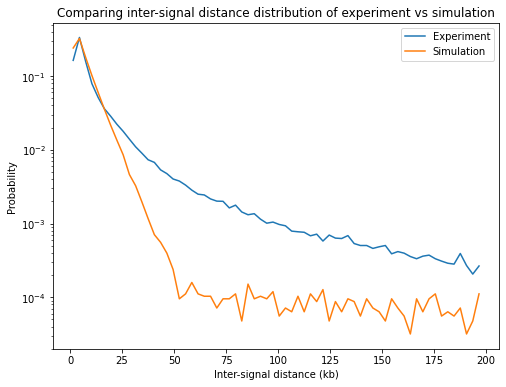

In [4]:
%%time

file_name = "../chromosomes/chr1/frag_sig.pkl"

open_file = open(file_name, "rb")

frag_sig = pk.load(open_file)

open_file.close()

n_fiber = len(frag_sig)
intersig = []   # number of signals at each fragment

for i in range(n_fiber):
    intersig +=  list( np.array(frag_sig[i][2:-1])/1000 - np.array(frag_sig[i][1:-2])/1000 )

bins = np.arange(0, 200, 3)

intersig_dist, intersig_bins = np.histogram(intersig, bins = bins)

I_0 = 1e-5
R_0 = 0.3
T = 10
n_sim = 500000

v = 1.65   # kb/min
lf = 300   # kb


xb = 300     # kb
dx = 3       # kb
n_x = int(2*xb/dx)     

tb = 90       # min
dt = 1       # min
n_t = int(tb/dt)


avg_init = I_0*tb*(2*xb)

pos = np.linspace(int(-xb/2), int(xb/2), int(n_x/2)+1)

sim = []
test = []
for i in range(n_sim):

    init = []
    n_init = int(poisson.rvs(avg_init))
    init = np.zeros([n_init, 2])
    init[:, 0] = (np.random.choice(n_x+1, n_init)-n_x/2)*dx
    init[:, 1] = np.random.choice(n_t+1, n_init)*dt

    track = np.zeros([n_init+1, int(n_x/2)+1])
    for j in range(n_init):
        track[j, :] = init[j, 1] + np.abs(pos-init[j, 0])/v
    track[-1, :] = tb
    t_track = np.min(track, axis=0)

    inc = R_0*np.exp( -(t_track/T)**2/2 )*dx
    avg_label = np.sum(inc)
    label_dist = inc/avg_label
    n_labels = poisson.rvs(avg_label)
    label_pos = np.random.choice(pos, n_labels, p=label_dist)
    label_pos_sort = np.sort(label_pos)
    sim += list( label_pos_sort[1:] - label_pos_sort[:-1] )
    test += [list( label_pos_sort )]

sim_dist, sim_bins = np.histogram(sim, bins = bins)


fig, ax = plt.subplots()

fig.set_size_inches(8, 6)

ax.plot( (intersig_bins[1:]+intersig_bins[:-1])/2, intersig_dist/np.sum(intersig_dist), label='Experiment' )
ax.plot( (sim_bins[1:]+sim_bins[:-1])/2, sim_dist/np.sum(sim_dist), label='Simulation')

ax.set_xlabel('Inter-signal distance (kb)')
ax.set_ylabel('Probability')
ax.set_yscale('log')
ax.set_title('Comparing inter-signal distance distribution of experiment vs simulation')
ax.legend(loc='best')

In [40]:
test

[[],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [-39.0, -33.0],
 [],
 [96.0, 99.0, 99.0, 105.0, 108.0, 117.0],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [-78.0, -75.0, -3.0, 6.0, 12.0, 12.0, 15.0, 15.0, 18.0, 21.0, 30.0, 42.0],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [141.0, 144.0, 147.0, 150.0],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [75.0, 78.0, 81.0, 99.0, 102.0, 117.0, 120.0, 138.0],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [24.0, 45.0],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [114.0],
 [],
 [],
 [],

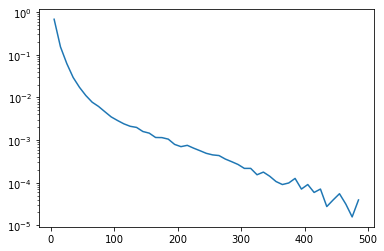

In [13]:
bins = np.arange(0, 500000, 10000)

intersig_dist, intersig_bins = np.histogram(intersig, bins = bins)

plt.plot( (intersig_bins[1:]+intersig_bins[:-1])/2000, intersig_dist/np.sum(intersig_dist) )
plt.yscale('log')

In [4]:
file_name = "initiation_I0=" + str(I0)

open_file = open(file_name, "wb")

pk.dump(init_pos, open_file)

open_file.close()

In [21]:
file_name = "initiation_I0=" + str(I0)

open_file = open(file_name, "rb")

init_pos_time = pk.load(open_file)

open_file.close()

In [7]:
k = 0
for i in range(len(init_pos_time)):
    k += len(init_pos_time[i])

k/len(init_pos_time)

1.6213

In [6]:
init_pos_time

[[[-133.0, 1], [-68.0, 60], [116.0, 59], [165.0, 79]],
 [],
 [[-86.0, 57], [293.0, 13], [239.0, 19]],
 [[122.0, 34], [127.0, 70]],
 [],
 [[280.0, 79], [-15.0, 62], [-143.0, 30]],
 [],
 [[214.0, 16], [118.0, 15], [-81.0, 80], [-22.0, 80]],
 [[-199.0, 69]],
 [],
 [],
 [[-123.0, 83], [119.0, 76]],
 [[126.0, 58]],
 [[-59.0, 8], [-185.0, 24], [25.0, 51], [-169.0, 59], [111.0, 12]],
 [[-114.0, 7]],
 [[-126.0, 58], [45.0, 29]],
 [[-31.0, 83]],
 [[110.0, 7], [81.0, 75], [-228.0, 77]],
 [[205.0, 51]],
 [[268.0, 35]],
 [[213.0, 44]],
 [[206.0, 6], [170.0, 74]],
 [[-107.0, 60]],
 [[-201.0, 38]],
 [[-196.0, 41], [193.0, 77]],
 [[-250.0, 25], [-187.0, 14]],
 [[297.0, 33], [-78.0, 2]],
 [[-180.0, 23], [29.0, 13], [143.0, 78]],
 [[23.0, 32], [-47.0, 18]],
 [[187.0, 67], [-257.0, 87]],
 [],
 [],
 [[88.0, 79], [-34.0, 18], [276.0, 29], [-169.0, 5]],
 [[259.0, 79], [164.0, 18]],
 [[159.0, 37]],
 [[-65.0, 17], [4.0, 38], [167.0, 24]],
 [[-207.0, 20], [-237.0, 45]],
 [[-59.0, 42], [275.0, 21], [-204.0, 80

In [22]:
%%time
''' Finding the replication tracks. '''

t_track = np.zeros([n_sim, n_x+1])
i_track = 0
pos = np.linspace(-xb, xb, n_x+1)

k=0
for i in range(n_sim):
    init = init_pos_time[i]
    n_init = len(init)
    track = np.zeros([n_init+1, n_x+1])
    track[-1, :] = tb
    for j in range(n_init):
        init_pos = init[j][0]
        init_time = init[j][1]
        track[j, :] += init_time + np.abs(pos-init_pos)/v
    t_track[i, :] = np.min(track, axis=0)
        
np.savetxt('t_track' + str(I0) + '.txt', t_track)

CPU times: user 31.9 s, sys: 1.28 s, total: 33.1 s
Wall time: 33.2 s


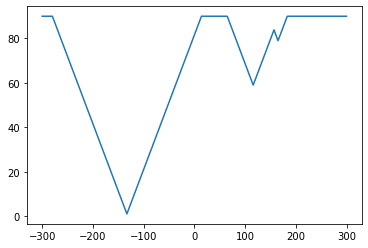

In [10]:
fig, ax = plt.subplots()

ax.plot(pos, t_track[0, :])

In [11]:
t_track = np.loadtxt('t_track' + str(I0) + '.txt')
t_track.shape

(80132, 601)

In [12]:
np.mean(t_track)

77.32458211963157

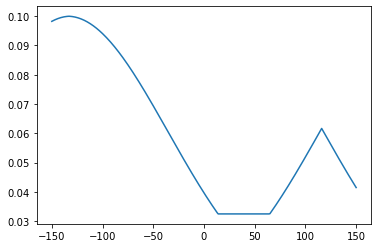

In [4]:
t_track = np.loadtxt('t_track' + str(I0) + '.txt')

pos = np.linspace(int(-xb/2), int(xb/2), int(n_x/2)+1)

inc = R0*np.exp(-(t_track[: , int(n_x/4):int(3*n_x/4) + 1]/tau)**2/2)

fig, ax = plt.subplots()

ax.plot(pos, inc[0, :])

np.savetxt('inc' + str(I0) + '.txt', inc)

In [18]:
inc.shape

(301, 601)

In [5]:
%%time
''' Finding the incorporaion rate. '''

inc = np.loadtxt('inc' + str(I0) + '.txt')

avg_label = np.sum(inc, axis = 1)

n_track = inc.shape[0]

n_labels = np.zeros([n_track])


for i in range(n_track):
    n_labels[i] = int(poisson.rvs(avg_label[i]))

np.savetxt('n_labels' + str(I0) + '.txt', n_labels)



CPU times: user 25.5 s, sys: 1.06 s, total: 26.6 s
Wall time: 27.7 s


In [8]:
avg_label.shape

(80132,)

In [6]:
n_track

80132

In [3]:
%%time

inc = np.loadtxt('inc' + str(I0) + '.txt')
n_labels = np.loadtxt('n_labels' + str(I0) + '.txt')
label_pos = []

n_track = n_labels.shape[0]
pos = np.linspace(-xb, xb, n_x+1)

CPU times: user 3.37 s, sys: 103 ms, total: 3.47 s
Wall time: 4.02 s


In [7]:
%%time

for i in range(n_track):
    label_pos += [ list(np.random.choice(pos, int(n_labels[i]), p=inc[i, :]/np.sum(inc[i,:]) )) ]

KeyboardInterrupt: 

In [9]:
n_track

40209

In [9]:
file_name = "/chr1/frag_sig.pkl"

open_file = open(file_name, "rb")

frag_sig = pk.load(open_file)

open_file.close()

n_fiber = len(frag_sig)
signal_number = []   # number of signals at each fragment

for i in range(n_fiber):
    signal_number += [len(frag_sig[i]) - 2]

signal_number = np.array(signal_number)

signal_dist, signal_bins = np.histogram(signal_number, bins)

In [7]:
bins = np.linspace(0, 30, 31) - 0.5
bins

array([-0.5,  0.5,  1.5,  2.5,  3.5,  4.5,  5.5,  6.5,  7.5,  8.5,  9.5,
       10.5, 11.5, 12.5, 13.5, 14.5, 15.5, 16.5, 17.5, 18.5, 19.5, 20.5,
       21.5, 22.5, 23.5, 24.5, 25.5, 26.5, 27.5, 28.5, 29.5])

In [8]:
sim_dist, sim_bins = np.histogram(n_labels, bins=bins)

In [14]:
sim_bins

array([-0.5,  0.5,  1.5,  2.5,  3.5,  4.5,  5.5,  6.5,  7.5,  8.5,  9.5,
       10.5, 11.5, 12.5, 13.5, 14.5, 15.5, 16.5, 17.5, 18.5, 19.5, 20.5,
       21.5, 22.5, 23.5, 24.5, 25.5, 26.5, 27.5, 28.5, 29.5])

In [23]:
np.mean(n_labels)

26.499051564917885

In [26]:
np.mean(avg_label)

26.50164851617586

In [13]:
0.1*300*np.exp(-77**2/(2*60**2))

13.167150895550055

In [14]:
300/(2*1.65)

90.90909090909092

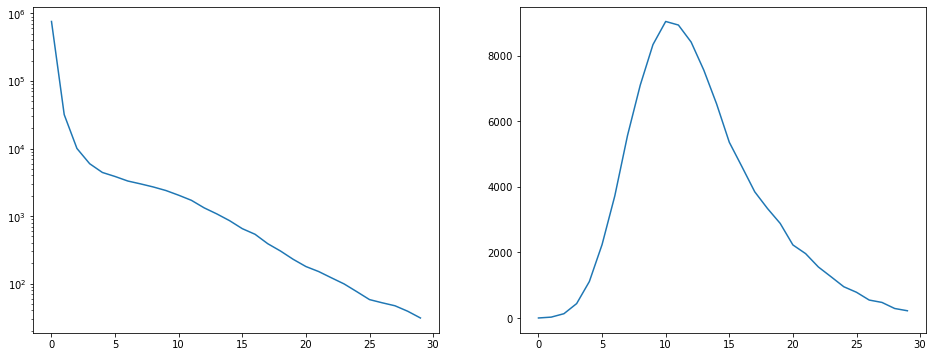

In [10]:
fig, (ax1, ax2) = plt.subplots(1, 2)

fig.set_size_inches(16, 6)

ax1.plot( (signal_bins[1:]+signal_bins[:-1])/2,  signal_dist)
ax1.set_yscale('log')

ax2.plot( (sim_bins[1:]+sim_bins[:-1])/2,  sim_dist )

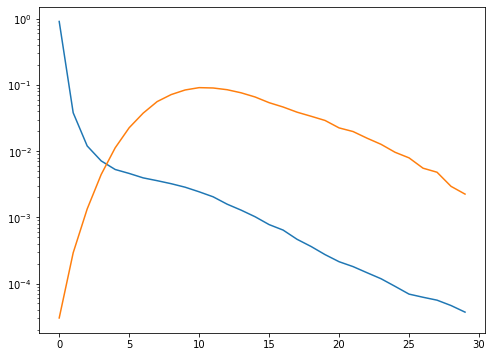

In [12]:
fig, ax = plt.subplots()

fig.set_size_inches(8, 6)

ax.plot( (signal_bins[1:]+signal_bins[:-1])/2,  signal_dist/np.sum(signal_dist))
ax.plot( (sim_bins[1:]+sim_bins[:-1])/2,  sim_dist/np.sum(sim_dist) )

ax.set_yscale('log')

